In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

# Doing The head and Tail to generate the random walk

In [88]:
def random_walker(n_step=1000,Initial_position=0,step_size=1):
    """This function will generate the random walker on
    the basis of pre-assigned steps, and initial position
    n_step: number of step walker needed
    Initial_postion: position of walker at begining
    step_size: size of single step"""
    import random
    head=0
    tail=1
    positions=[Initial_position]
    for i in range(n_step):
        if head == random.randint(0,1):
            positions.append(positions[-1]+step_size)
        else:
            positions.append(positions[-1]-step_size)
    return positions    

In [89]:
walk=random_walker(n_step=100)

In [90]:
import random
random_w=[0]
head=1
tail=2
for i in range(100):
    for _ in range(i):
        if head==random.randint(1,2):
            random_w.append(random_w[-1]+1)
        else:
            random_w.append(random_w[-1]-1)

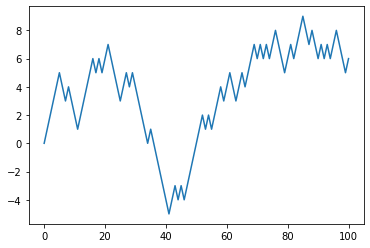

In [91]:
plt.plot(walk)

In [269]:
sum_walk=[]
for i in range(10000):
    sum_walk.append(np.sum(random_walker(n_step=100)))

In [270]:
sum_walk

[-258,
 202,
 14,
 418,
 -14,
 -934,
 284,
 -424,
 318,
 222,
 -714,
 436,
 -978,
 542,
 -44,
 -456,
 398,
 438,
 -384,
 -460,
 22,
 502,
 -766,
 142,
 24,
 -776,
 254,
 -588,
 -604,
 554,
 -104,
 -466,
 560,
 -322,
 -26,
 78,
 -12,
 832,
 748,
 404,
 -1266,
 58,
 932,
 374,
 -12,
 -754,
 138,
 480,
 -76,
 806,
 -330,
 314,
 560,
 1516,
 -726,
 334,
 -416,
 70,
 -670,
 -360,
 -838,
 168,
 504,
 -488,
 -330,
 -556,
 476,
 30,
 474,
 552,
 140,
 -670,
 190,
 420,
 -118,
 -110,
 -208,
 1028,
 522,
 24,
 54,
 -374,
 90,
 774,
 298,
 932,
 -850,
 -354,
 -948,
 606,
 482,
 358,
 72,
 -2044,
 944,
 -144,
 -228,
 -36,
 68,
 714,
 356,
 244,
 -412,
 -548,
 -1088,
 -986,
 10,
 604,
 -176,
 382,
 1304,
 658,
 -592,
 38,
 34,
 1120,
 -524,
 -110,
 368,
 696,
 -540,
 406,
 -654,
 1066,
 -22,
 -544,
 -1292,
 670,
 -402,
 -1526,
 -1584,
 400,
 -34,
 -244,
 790,
 804,
 10,
 182,
 -148,
 110,
 292,
 -350,
 1116,
 -416,
 794,
 146,
 1258,
 -94,
 256,
 78,
 454,
 1022,
 -156,
 482,
 -400,
 -42,
 148,
 -1

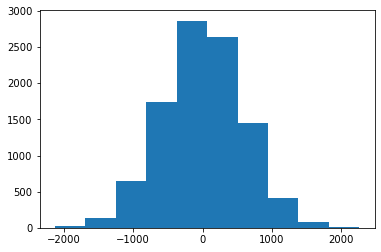

In [271]:
plt.hist(sum_walk);

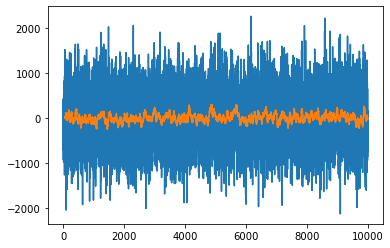

In [272]:
import pandas as pd
plt.plot(sum_walk)
df = pd.DataFrame(sum_walk)
plt.plot(df.rolling(window = 50).mean()) 

In [273]:
from sklearn.mixture import GaussianMixture as GM
clf=GM(n_components=1,warm_start=True)

In [274]:
X=np.array(sum_walk).reshape(-1,1)

In [275]:
for i in range(1,10000):
    clf.fit(X)

In [276]:
mean=clf.means_

In [277]:
std=np.sqrt(clf.covariances_[0][0][0])

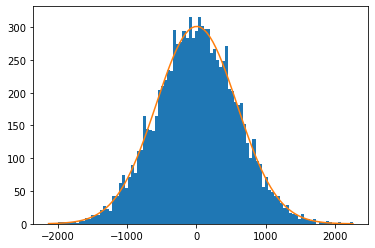

In [280]:
h,xedge,_=plt.hist(sum_walk,bins=100)
g=ss.norm.pdf(xedge,mean,std)
pd=(g/np.sum(g))*np.sum(h)
plt.plot(xedge,pd[0])

# I didn't get mean exactly 0 but near around And found the Gaussian distribution

In [286]:
print(f'The mean of random walk: {mean[0][0]}')
print(f'The variance of random walk: {std}')

The mean of random walk: 4.3564
The variance of random walk: 581.280665582505


# Extending Code for 2-Dimension

There are 4 possible cases :
1. "x" increase and "y" increase
2. "x" increase and "y" decrease
3. "x" decrease and "y" increase
4. "x" decrease and "y" decrease

In [293]:
def random_walk_2d(n_step=1000)  :
    import random
    x=[0]
    y=[0]
    for i in range(n_step):
        toss=random.randint(1,4)
        if toss==1:
            x.append(x[-1]+1)
            y.append(y[-1]+1)
        elif toss == 2:
            x.append(x[-1]+1)
            y.append(y[-1]-1)
        elif toss == 3:
            x.append(x[-1]-1)
            y.append(y[-1]+1)
        else:
            x.append(x[-1]-1)
            y.append(y[-1]-1)
    return x,y

In [304]:
x,y=random_walk_2d(n_step=100000)

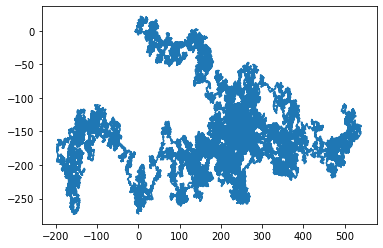

In [305]:
plt.plot(x,y)